In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("/Users/ruthwetters/Downloads/dftrumpsent.csv")

In [18]:
# Load the regular expression library
import re
# Remove punctuation
df['paper_text_processed'] = \
df['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['paper_text_processed'] = \
df['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['paper_text_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-18-098c37b5056b>:5: DeprecationWarning: invalid escape sequence \.
  df['content'].map(lambda x: re.sub('[,\.!?]', '', x))


0    dan bongino: "nobody trolls liberals better th...
1          '@realdonaldtrump we love you mr president'
2    '@realdonaldtrump thank you for being the @pot...
3    '@realdonaldtrump thank you for being a potus ...
4    '@realdonaldtrump more proud now than ever fin...
Name: paper_text_processed, dtype: object

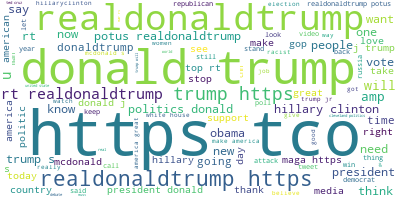

In [19]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [20]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['tco','https','http'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruthwetters/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dan', 'bongino', 'nobody', 'trolls', 'liberals', 'better', 'donald', 'trump', 'exactly', 'aigv', 'ac']


In [21]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [22]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.060*"realdonaldtrump" + 0.022*"trump" + 0.020*"donald" + 0.019*"rt" + '
  '0.007*"us" + 0.005*"president" + 0.005*"people" + 0.004*"obama" + '
  '0.004*"hillary" + 0.004*"clinton"'),
 (1,
  '0.059*"trump" + 0.054*"donald" + 0.039*"realdonaldtrump" + 0.009*"rt" + '
  '0.007*"gop" + 0.006*"president" + 0.006*"politics" + 0.004*"maga" + '
  '0.004*"news" + 0.004*"amp"'),
 (2,
  '0.057*"realdonaldtrump" + 0.032*"trump" + 0.022*"donald" + 0.019*"rt" + '
  '0.011*"potus" + 0.006*"new" + 0.005*"maga" + 0.005*"hillary" + '
  '0.004*"president" + 0.004*"amp"'),
 (3,
  '0.061*"realdonaldtrump" + 0.019*"rt" + 0.010*"donald" + 0.008*"trump" + '
  '0.008*"mcdonald" + 0.006*"cnn" + 0.005*"like" + 0.004*"great" + '
  '0.004*"potus" + 0.004*"new"'),
 (4,
  '0.044*"trump" + 0.041*"donald" + 0.031*"realdonaldtrump" + 0.012*"mcdonald" '
  '+ 0.009*"people" + 0.008*"news" + 0.007*"rt" + 0.005*"us" + 0.004*"maga" + '
  '0.004*"potus"'),
 (5,
  '0.112*"trump" + 0.104*"donald" + 0.015*"politics" + 

In [23]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/ruthwetters/Downloads/'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
#pyLDAvis.save_html(LDAvis_prepared, '/Users/ruthwetters/Downloads/ldavis'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.146074  0.035325       1        1  18.519136
1      0.070100  0.011273       2        1  12.795785
2     -0.022989  0.023126       3        1  11.986045
0     -0.046819  0.062717       4        1  11.250940
8     -0.086111  0.043519       5        1   8.925727
6      0.075519 -0.029991       6        1   8.332486
4      0.027641  0.014104       7        1   8.185913
3     -0.126386 -0.020212       8        1   7.204356
9     -0.032071  0.003981       9        1   7.006595
7     -0.004958 -0.143843      10        1   5.793020, topic_info=                 Term          Freq         Total Category  logprob  loglift
14    realdonaldtrump  17062.000000  17062.000000  Default  30.0000  30.0000
5              donald  18683.000000  18683.000000  Default  29.0000  29.0000
10              trump  20636.000000  20636.000000  Default  28.0000  28.0000
653                rt   4839.000000   4839.000000  Default  27.0000  27.0000
107             great    893.000000    893.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
332              said     47.504654    435.860474  Topic10  -6.2271   0.6320
386              time     48.719101    742.441956  Topic10  -6.2019   0.1246
6868         politics     50.801636   1916.677612  Topic10  -6.1600  -0.7819
13          president     50.963707   2678.502930  Topic10  -6.1568  -1.1134
726                us     48.353279   1350.037842  Topic10  -6.2094  -0.4808

[889 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
4142       3  0.890424      a_
4142       4  0.084802      a_
26679     10  0.968059   abbas
1635       1  0.126692     abc
1635       2  0.019004     abc
...      ...       ...     ...
12434      3  0.023109  трампа
12434      4  0.716366  трампа
12434      7  0.196423  трампа
12434      9  0.046217  трампа
29475      8  0.949038     это

[2779 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 3, 1, 9, 7, 5, 4, 10, 8])